# July 17, 2025

## Feature Engineering

### Feature Selection based on correlation to target column

- **Data Preprocessing**
    - Finding NA
    - outlier removal
    - scaling
    - encoding
    - Correlation analysis
    - Sort in desc based on magnitude

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
data = np.random.exponential(scale=1, size = 1000)
transformed_data, lambda_value= stats.boxcox(data)

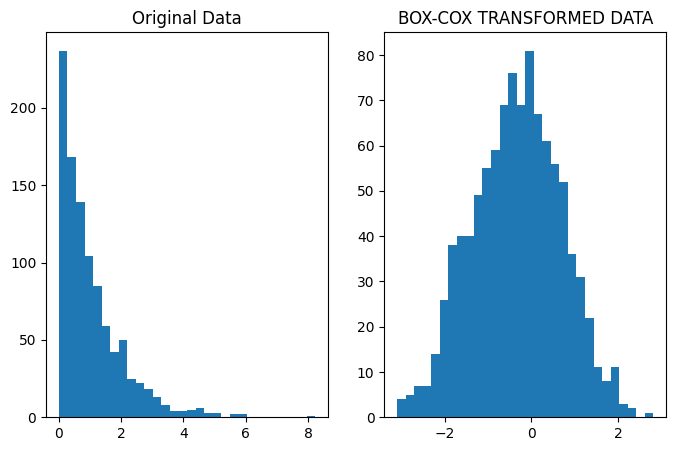

In [ ]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.hist(data, bins=30)
plt.title("Original Data")
plt.subplot(1,2,2)
plt.hist(transformed_data, bins=30)
plt.title("BOX-COX TRANSFORMED DATA")
plt.show()

In [ ]:
import pandas as pd
df = pd.read_csv('beer-servings.csv')
df

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...,...
188,188,Venezuela,NaN,100.0,3.0,7.7,South America
189,189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,190,Yemen,6.0,0.0,0.0,0.1,Asia
191,191,Zambia,32.0,19.0,4.0,2.5,Africa


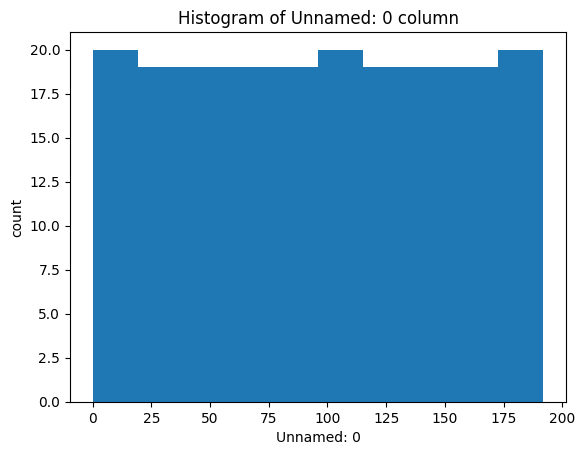

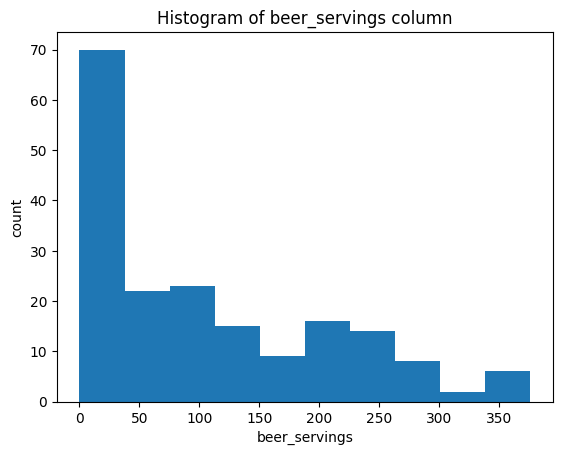

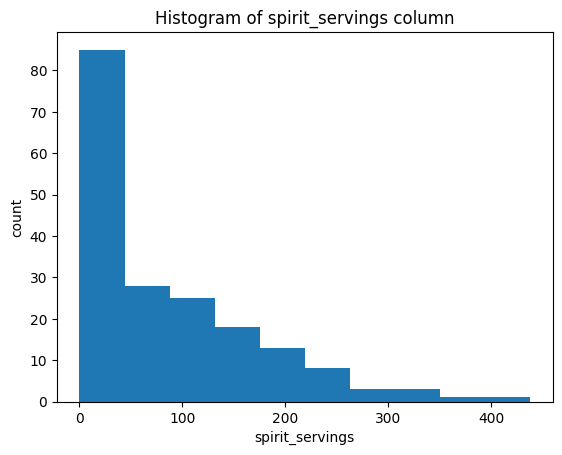

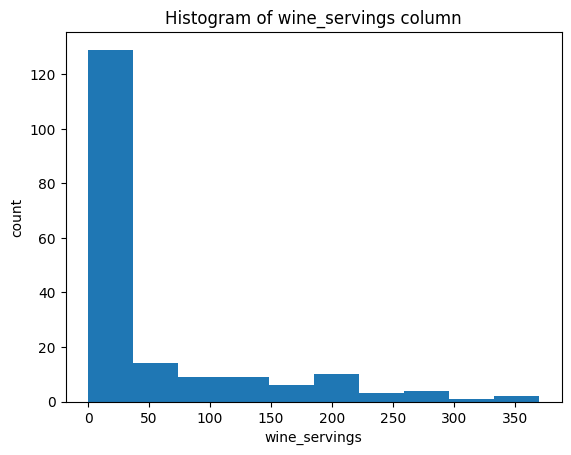

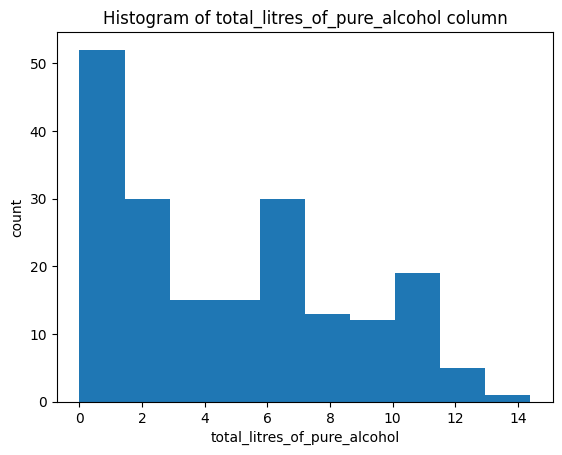

In [ ]:
import matplotlib.pyplot as plt
num_df = df.select_dtypes(include="number")
num_cols = num_df.columns.tolist()
for col in num_cols:
    plt.hist(num_df[col].dropna())
    plt.title(f'Histogram of {col} column')
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

## Genetic Feature Engineering

- Feature selection based on correlation to target column
    - Data Preprocessing
    - Compute correlation w.r.t Target column
    - Take absolute value of correlation
    - Sort in descending order and find most relevant features
- Log transformation for tailed distributed numerical columns
- Feature binning
- Indicator Variable

In [ ]:
bins = pd.cut(df['beer_servings'], bins=2, labels=['low', 'high'])
df['beer_servings_binned'] = bins
display(df[['beer_servings', 'beer_servings_binned']].head())
display(df['beer_servings_binned'].value_counts())

,beer_servings,beer_servings_binned
0,0.0,low
1,89.0,low
2,25.0,low
3,245.0,high
4,217.0,high


beer_servings_binned
low     140
high     45
Name: count, dtype: int64

In [4]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

audio_data, sr = librosa.load("/content/WWE - Edge 7th Theme Song (Metalingus).mp3", sr=None, duration=8)
ipd.Audio(audio_data, rate=sr)

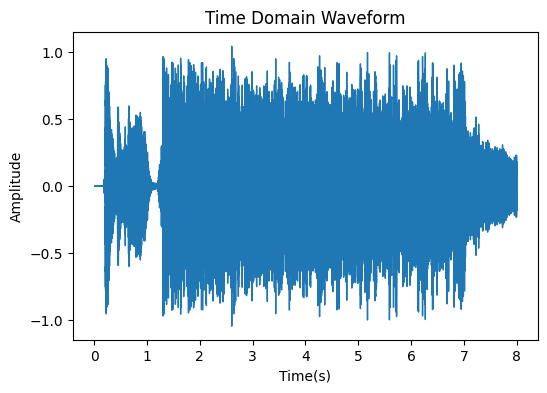

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
librosa.display.waveshow(audio_data, sr=sr)
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("Time Domain Waveform")
plt.show()

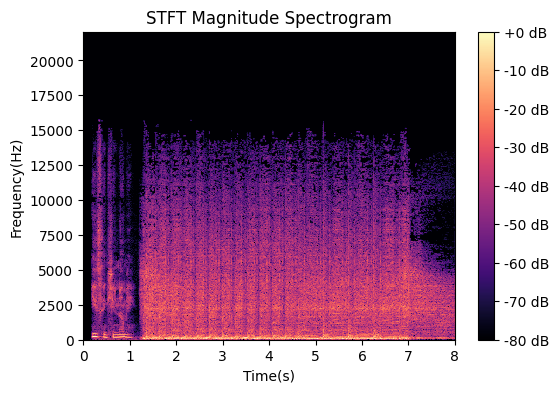

In [5]:
stft_spectrogram = librosa.stft(audio_data)
stft_magnitude = np.abs(stft_spectrogram)
stft_db=librosa.amplitude_to_db(stft_magnitude, ref=np.max)
plt.figure(figsize=(6,4))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title("STFT Magnitude Spectrogram")
plt.xlabel("Time(s)")
plt.ylabel("Frequency(Hz)")
plt.show()

In [6]:
import pandas as pd
df = pd.read_csv('auto-mpg.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [7]:
import numpy as np
toyota_corona_mark_ii_features = df[df['car name'] == 'toyota corona mark ii'].select_dtypes(include=np.number).dropna().iloc[0]
other_cars = df[df['car name'] != 'toyota corona mark ii'].select_dtypes(include=np.number).dropna()
dot_products = other_cars.apply(lambda row: np.dot(row, toyota_corona_mark_ii_features), axis=1)
most_similar_cars_indices = dot_products.nlargest(5).index
most_similar_cars = df.loc[most_similar_cars_indices][['car name']]
print("Top 5 similar cars to 'toyota corona mark ii' based on dot product:")
most_similar_cars

Top 5 similar cars to 'toyota corona mark ii' based on dot product:


,car name
44,pontiac safari (sw)
103,chevrolet impala
42,dodge monaco (sw)
95,buick electra 225 custom
90,mercury marquis brougham


In [8]:
toyota_corona_mark_ii_features = df[df['car name'] == 'toyota corona mark ii'].select_dtypes(include=np.number).dropna().iloc[0]
other_cars = df[df['car name'] != 'toyota corona mark ii'].select_dtypes(include=np.number).dropna()
def cosine_similarity(vec1, vec2):
  dot_product = np.dot(vec1, vec2)
  norm_vec1 = np.linalg.norm(vec1)
  norm_vec2 = np.linalg.norm(vec2)
  if norm_vec1 == 0 or norm_vec2 == 0:
    return 0
  return dot_product / (norm_vec1 * norm_vec2)
similarities = other_cars.apply(lambda row: cosine_similarity(row, toyota_corona_mark_ii_features), axis=1)
least_similar_car_index = similarities.nsmallest(1).index[0]
least_similar_car = df.loc[least_similar_car_index][['car name', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]
print("Car most orthogonal to 'toyota corona mark ii' based on cosine similarity:")
least_similar_car

Car most orthogonal to 'toyota corona mark ii' based on cosine similarity:


,13
car name,buick estate wagon (sw)
mpg,14.0
cylinders,8
displacement,455.0
horsepower,225
weight,3086
acceleration,10.0
model year,70
origin,1


In [9]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [10]:
pca = PCA(n_components=2)
X = df.select_dtypes(include=np.number).dropna()
X_2d = pca.fit_transform(X)

Original data shape: (398, 7)
Projected data shape (2D): (398, 2)


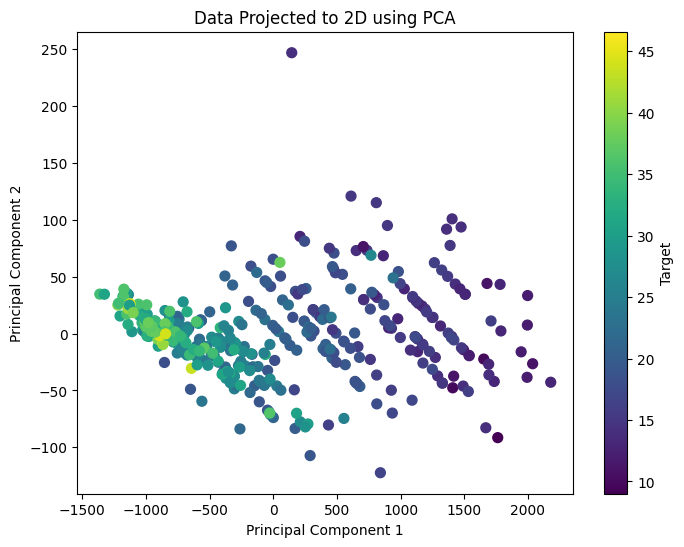

In [11]:
print("Original data shape:", X.shape)
print("Projected data shape (2D):", X_2d.shape)
y = df.loc[X.index, 'mpg']
if 'y' in globals():
    plt.figure(figsize=(8, 6))
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='viridis', s=50)
    plt.title("Data Projected to 2D using PCA")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.colorbar(label='Target')
    plt.show()
else:
    print("Target variable 'y' not found. Scatter plot will not be colored by target.")
    plt.figure(figsize=(8, 6))
    plt.scatter(X_2d[:, 0], X_2d[:, 1], s=50)
    plt.title("Data Projected to 2D using PCA")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()

In [12]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
data = load_breast_cancer()
X=pd.DataFrame(data.data, columns=data.feature_names)
y=data.target
dataset = X
dataset["target"] = y

dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [14]:
dataset.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


<Axes: >

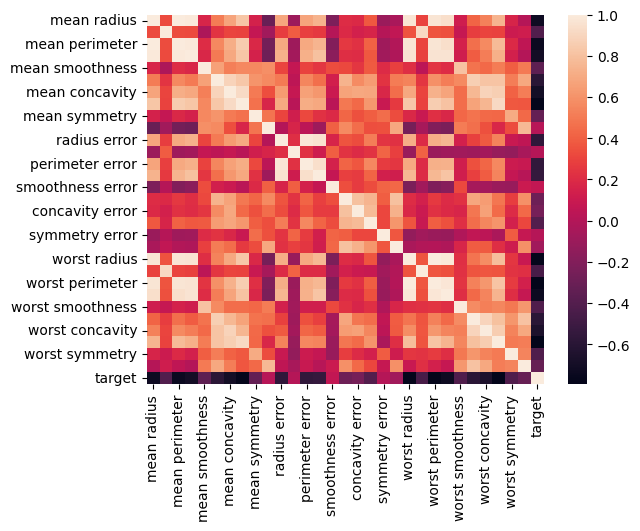

In [15]:
data_corr = dataset.corr()
sns.heatmap(dataset.corr())

In [16]:
data_corr['target']

,target
mean radius,-0.730029
mean texture,-0.415185
mean perimeter,-0.742636
mean area,-0.708984
mean smoothness,-0.358560
mean compactness,-0.596534
mean concavity,-0.696360
mean concave points,-0.776614
mean symmetry,-0.330499
mean fractal dimension,0.012838


In [17]:
threshold = 0.7
corr_features = data_corr.index[abs(data_corr['target'])>threshold]
corr_features

Index(['mean radius', 'mean perimeter', 'mean area', 'mean concave points',
       'worst radius', 'worst perimeter', 'worst area', 'worst concave points',
       'target'],
      dtype='object')

In [18]:
top_5 = abs(data_corr['target']).sort_values(ascending=False).iloc[:5]
print(top_5)

target                  1.000000
worst concave points    0.793566
worst perimeter         0.782914
mean concave points     0.776614
worst radius            0.776454
Name: target, dtype: float64


In [19]:
least = abs(data_corr['target']).sort_values(ascending=True).iloc[:5]
print(least)

symmetry error             0.006522
texture error              0.008303
mean fractal dimension     0.012838
smoothness error           0.067016
fractal dimension error    0.077972
Name: target, dtype: float64


In [20]:
from sklearn.feature_selection import VarianceThreshold
import numpy as np
import pandas as pd

In [21]:
X=pd.DataFrame({
    'feature_1': [1,1,1,1,1],
    'feature_2': [1,0,1,0,1],
    'feature_3': [5,6,7,8,9]
})

In [22]:
selector = VarianceThreshold(threshold = 0.1)
X_selected = selector.fit_transform(X)

selected_features = selector.get_feature_names_out()
print(selected_features)

['feature_2' 'feature_3']


In [23]:
dataset.describe().loc['std'].sort_values(ascending=False).iloc[:5]

,std
worst area,569.356993
mean area,351.914129
area error,45.491006
worst perimeter,33.602542
mean perimeter,24.298981


In [24]:
selector = VarianceThreshold(threshold=590)
X_selected = selector.fit_transform(dataset)
selected_columns = dataset.columns[selector.get_support()]
X_filtered = pd.DataFrame(X_selected, columns = selected_columns)
print("Selected Fatures:")
print(selected_columns)

Selected Fatures:
Index(['mean area', 'area error', 'worst perimeter', 'worst area'], dtype='object')


In [25]:
data = load_breast_cancer()
X=pd.DataFrame(data.data, columns=data.feature_names)
y=data.target
dataset = X
dataset["target"] = y
from sklearn.feature_selection import mutual_info_classif
mi_scores = mutual_info_classif(X, y, random_state = 42)
mi_series = pd.Series(mi_scores, index = X.columns)
mi_series = mi_series.sort_values(ascending=False)
print(mi_series.head(5))

target                 0.661196
worst perimeter        0.478604
worst area             0.463900
worst radius           0.450458
mean concave points    0.440121
dtype: float64


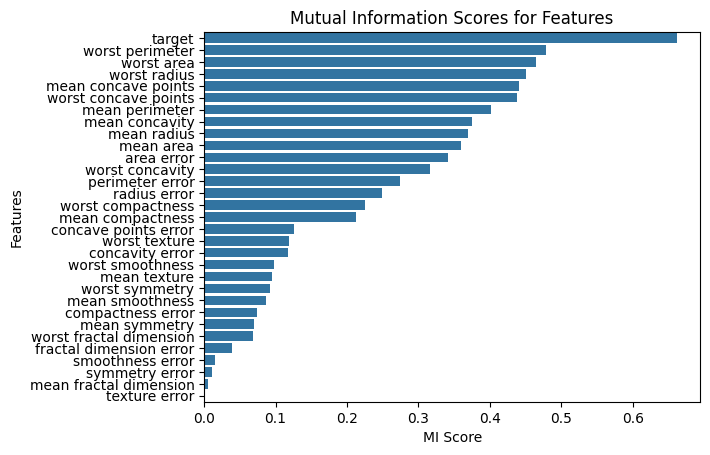

In [26]:
sns.barplot(x=mi_series, y=mi_series.index)
plt.title("Mutual Information Scores for Features")
plt.xlabel("MI Score")
plt.ylabel("Features")
plt.show()

In [27]:
top_k = 10
selected_features = mi_series.head(top_k).index.tolist()
X_selected = X[selected_features]
print(X_selected.columns)

Index(['target', 'worst perimeter', 'worst area', 'worst radius',
       'mean concave points', 'worst concave points', 'mean perimeter',
       'mean concavity', 'mean radius', 'mean area'],
      dtype='object')


In [28]:
threshold = 0.05
selected_features = mi_series[mi_series > threshold].index.tolist()
print(selected_features)

['target', 'worst perimeter', 'worst area', 'worst radius', 'mean concave points', 'worst concave points', 'mean perimeter', 'mean concavity', 'mean radius', 'mean area', 'area error', 'worst concavity', 'perimeter error', 'radius error', 'worst compactness', 'mean compactness', 'concave points error', 'worst texture', 'concavity error', 'worst smoothness', 'mean texture', 'worst symmetry', 'mean smoothness', 'compactness error', 'mean symmetry', 'worst fractal dimension']
